# Analysis of User Adoption Patterns
### Objective:
To identify factors influencing user adoption, defined as logging into the product on three separate days in a seven-day period. 


### 1. Data 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
users_df = pd.read_csv("takehome_users.csv", encoding="utf-8", encoding_errors="ignore")

engagement_df = pd.read_csv("takehome_user_engagement.csv")

users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [137]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [131]:
users_df.describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [139]:
users_df.rename(columns={'object_id':'user_id'}, inplace=True)

In [141]:
users_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [143]:
merge_data = pd.merge(users_df, engagement_df, on='user_id', how='right')
merge_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [145]:
merge_data['date'] = merge_data['time_stamp'].astype('datetime64[ns]')
merge_data['week'] = merge_data['date'].dt.isocalendar().week
merge_data['year'] = merge_data['date'].dt.isocalendar().year
merge_data['month'] = merge_data['date'].dt.month

In [147]:
week_group = merge_data.groupby(['user_id', 'week', 'month', 'year'])['visited'].count().reset_index()

In [149]:
week_group.head()

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [151]:
adopted_user = week_group.loc[week_group['visited'] >= 3]
len(adopted_user)

32754

In [117]:
print(adopted_user.head())

    user_id  week  month  year  visited
3         2     6      2  2014        3
17       10     1      1  2014        4
19       10     2      1  2014        4
21       10     3      1  2014        6
23       10     4      1  2014        6


In [153]:
week_group['adopted_user'] = week_group['visited'].apply(lambda x:1 if x>=3 else 0)

In [125]:
week_group.head()

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [155]:
user_visited = week_group[(week_group['visited'] >= 3)]
user_visited.head()

,user_id,week,month,year,visited,adopted_user
3,2,6,2,2014,3,1
17,10,1,1,2014,4,1
19,10,2,1,2014,4,1
21,10,3,1,2014,6,1
23,10,4,1,2014,6,1


In [161]:
adopted_count = user_visited[['user_id', 'adopted_user']][user_visited['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:')
print(len(adopted_count))

Number of adopted users:
1416


### 2. Data Visualization

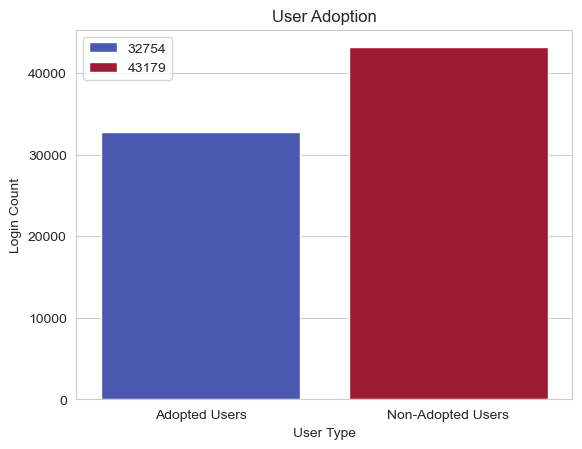

In [199]:
plot = sns.barplot(x=['Adopted Users', 'Non-Adopted Users'], y=[week_group.adopted_user.value_counts()[1], week_group.adopted_user.value_counts()[0]], hue= y, palette = 'coolwarm')
plt.title("User Adoption")
plt.xlabel("User Type")
plt.ylabel("Login Count")
plt.show()

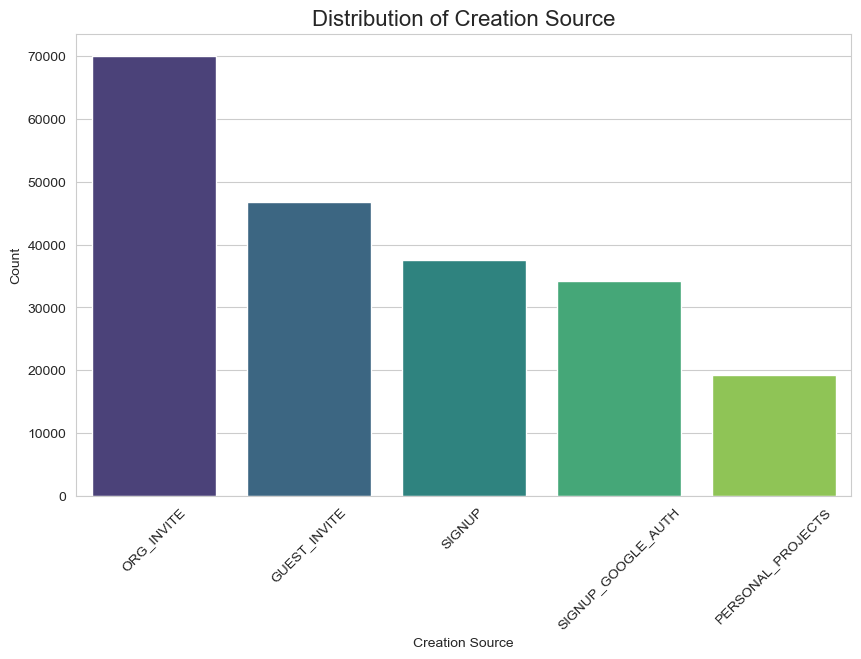

In [195]:
creation = merge_data['creation_source'].value_counts().reset_index()
creation.columns = ['Creation Source', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Creation Source', y='Count', data=creation, palette='viridis', hue='Creation Source', legend=False)
plt.title("Distribution of Creation Source", fontsize=16)
plt.xlabel("Creation Source")
plt.ylabel("Count")
plt.xticks(rotation=45) 

plt.show()

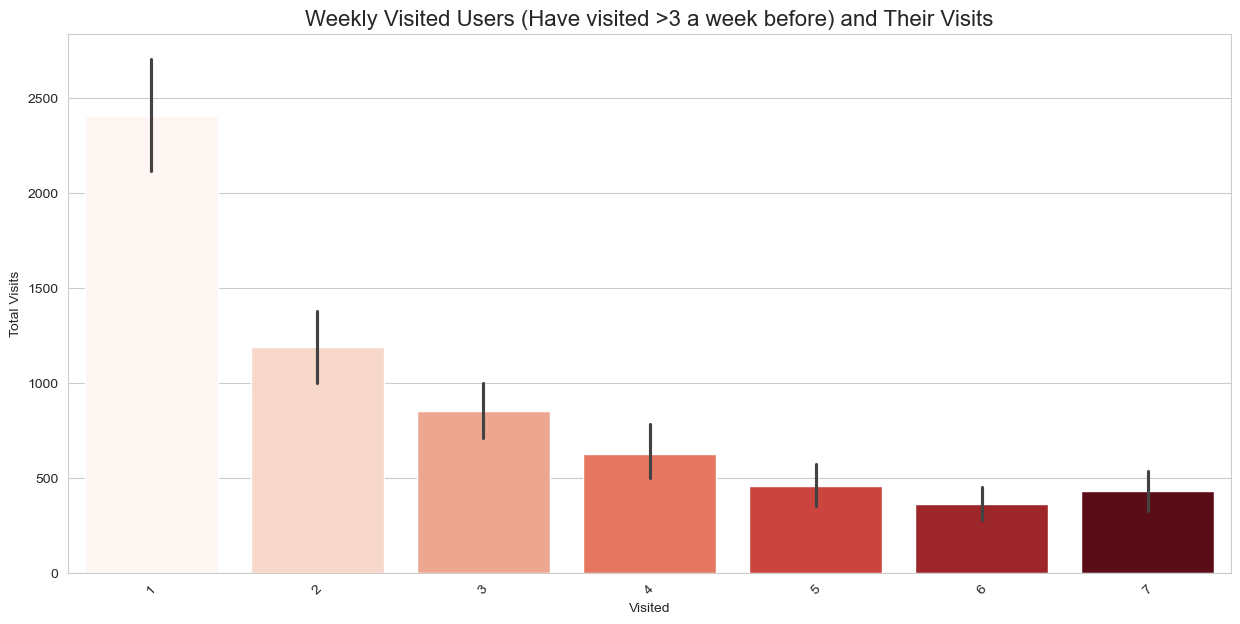

In [218]:

month_data = week_group.groupby(['visited','month']).size()
month_data = month_data.to_frame(name = 'total_visit').reset_index()

# Filter the data for users with at least 3 visits
filter_totalvisit = month_data[month_data['total_visit'] >= 3]

plt.figure(figsize=(15, 7))
sns.barplot(x='visited', y='total_visit', data=filter_totalvisit, palette='Reds', hue= 'visited', legend = False)
plt.title("Weekly Visited Users (Have visited >3 a week before) and Their Visits", fontsize=16)
plt.xlabel("Visited")
plt.ylabel("Total Visits")
plt.xticks(rotation=45) 

plt.show()

In [216]:
print(merge_data.head())

   user_id        creation_time            name                     email  \
0        1  2014-04-22 03:53:30  Clausen August  AugustCClausen@yahoo.com   
1        2  2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
2        2  2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
3        2  2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
4        2  2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE                1.398139e+09                         1   
1      ORG_INVITE                1.396238e+09                         0   
2      ORG_INVITE                1.396238e+09                         0   
3      ORG_INVITE                1.396238e+09                         0   
4      ORG_INVITE                1.396238e+09                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  \
0                        

In [ ]:

X = df.drop('adopted', axis=1)
y = df['adopted'] 

X_train, X_test, y_train, y_test = train_test_split(\
     X, y, test_size=0.3, random_state=0)